# 人工智能程序设计作业

## 171860607 白晋斌

### written by jupyter

1.假设有4个人每周喝奶茶的杯数分别是1、3、4、7，又假设这4个人的体重（kg）分别是50、65、60、63，请分别用数学、基于NumPy数组和基于pandas的corr()方法来计算两者之间的皮尔逊相关系数。

基于数学计算皮尔逊相关系数

In [30]:
#4个人平均每周喝奶茶的杯数是
(1+3+4+7)/4

3.75

In [31]:
#4个人的平均体重是
(50+65+60+63)/4

59.5

In [32]:
#分子为
(1-3.75)*(50-59.5)+(3-3.75)*(65-59.5)+(4-3.75)*(60-59.5)+(7-3.75)*(63-59.5)

33.5

In [35]:
#分母为
math.sqrt((1-3.75)**2+(3-3.75)**2+(4-3.75)**2+(7-3.75)**2)*math.sqrt((50-59.5)**2+(65-59.5)**2+(60-59.5)**2+(63-59.5)**2)

49.93746088859545

In [36]:
#皮尔逊相关系数为
33.5/49.93746088859545

0.6708390735911568

基于NumPy数组计算皮尔逊相关系数

In [10]:
import numpy as np
import math

x=np.array([1,3,4,7])
y=np.array([50,65,60,63])
x_mean=np.mean(x)
y_mean=np.mean(y)
u=sum((x-x_mean)*(y-y_mean))
l=math.sqrt(sum((x-x_mean)**2))*math.sqrt(sum((y-y_mean)**2))
print(u/l)

0.6708390735911568


基于pandas的corr()方法计算皮尔逊相关系数

In [8]:
import pandas as pd

x=[1,3,4,7]
y=[50,65,64,63]
df=pd.DataFrame()
df['x']=x
df['y']=y
print(df.corr())


          x         y
x  1.000000  0.652718
y  0.652718  1.000000


2.利用Tushare包中的接口函数获取某公司2019年第一季度的股票数据并完成如下数据处理和分析任务：

(1) 数据只保留date、open、high、close、low和volume这几个属性，并按时间先后顺序对数据进行排序:

In [11]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = ts.get_hist_data(code='000001',start='2019-01-01',end='2019-03-31')
     # 平安银行
lst = [ 'open', 'high', 'close', 'low', 'volume'] #date is in the df.index
data=df[lst]
data=data.sort_index()
print('Task-1:')
print(data)

Task-1:
             open   high  close    low      volume
date                                              
2019-01-02   9.39   9.42   9.19   9.16   539386.31
2019-01-03   9.18   9.33   9.28   9.15   415537.97
2019-01-04   9.24   9.82   9.75   9.22  1481159.00
2019-01-07   9.84   9.85   9.74   9.63   865687.69
2019-01-08   9.73   9.74   9.66   9.62   402388.12
2019-01-09   9.74  10.08   9.94   9.70  1233486.38
2019-01-10   9.87  10.20  10.10   9.86  1071817.62
2019-01-11  10.11  10.22  10.20  10.05   696364.56
2019-01-14  10.22  10.25  10.11  10.07   500443.59
2019-01-15  10.11  10.28  10.24  10.09   542160.56
2019-01-16  10.24  10.50  10.48  10.23   977699.38
2019-01-17  10.54  10.57  10.25  10.17   882811.94
2019-01-18  10.34  10.49  10.43  10.28   738793.25
2019-01-21  10.34  10.47  10.34  10.32   659355.75
2019-01-22  10.34  10.44  10.28  10.26   424413.56
2019-01-23  10.29  10.47  10.35  10.29   537876.62
2019-01-24  10.40  10.55  10.52  10.37   679240.88
2019-01-25  10.56  11.0

(2) 输出这一季度内成交量最低和最高那两天的日期和分别的成交量:

In [38]:
print('Task-2:')
data2=data[['volume']]
data2=data2.sort_values(by='volume')
print('minimum volume:\n',data2.head(1))
print('maximum volume:\n',data2.tail(1))

Task-2:
minimum volume:
                volume
date                 
2019-01-08  402388.12
maximum volume:
                volume
date                 
2019-02-25  2824935.0


(3) 列出成交量在1000000以上的记录:

In [13]:
print('Task-3:')
print(data[data.volume>1000000])

Task-3:
             open   high  close    low      volume
date                                              
2019-01-04   9.24   9.82   9.75   9.22  1481159.00
2019-01-09   9.74  10.08   9.94   9.70  1233486.38
2019-01-10   9.87  10.20  10.10   9.86  1071817.62
2019-01-25  10.56  11.04  11.00  10.55  2108362.00
2019-01-28  11.04  11.14  10.94  10.88  1035909.75
2019-02-01  11.20  11.25  11.20  10.96  1014270.06
2019-02-13  11.19  11.41  11.38  11.12  1137365.75
2019-02-15  11.23  11.23  10.95  10.90  1100127.50
2019-02-18  11.05  11.36  11.36  11.04  1255522.25
2019-02-19  11.36  11.62  11.27  11.24  1270882.12
2019-02-22  11.35  11.57  11.54  11.15  1184047.75
2019-02-25  11.70  12.64  12.55  11.57  2824935.00
2019-02-26  12.55  12.57  12.20  12.15  2017545.00
2019-02-27  12.24  12.66  12.40  12.15  1979013.88
2019-02-28  12.44  12.61  12.36  12.27  1113099.88
2019-03-01  12.48  12.78  12.76  12.20  1712679.25
2019-03-04  12.70  13.38  12.99  12.62  2456830.50
2019-03-05  12.91  13.2

(4) 计算这半年中收盘价（close）高于开盘价（open）的天数:

In [41]:
print('Task-4:')
count=0
count+=data.apply(lambda x:x['close']>x['open'], axis=1)
updays=count[count>0].count()
print('num of days whose \'close\' is higher than \'open\':',updays)

Task-4:
num of days whose 'close' is higher than 'open': 32


(5) 计算前后两天开盘价的涨跌情况，用两种方式表示，第一种输出每两天之间的差值（后一天减去前一天），第二种输出一个开盘价涨跌列表，涨用1表示，跌用-1表示；[提示：可使用diff()方法和sign()函数]

In [15]:
print('Task-5:')
data['up&down_way1'] = data['open'].diff()# df.diff()==df.shift()-df
data['up&down_way2']=np.sign(data['up&down_way1'])
print(data[['up&down_way1','up&down_way2']])

Task-5:
            up&down_way1  up&down_way2
date                                  
2019-01-02           NaN           NaN
2019-01-03         -0.21          -1.0
2019-01-04          0.06           1.0
2019-01-07          0.60           1.0
2019-01-08         -0.11          -1.0
2019-01-09          0.01           1.0
2019-01-10          0.13           1.0
2019-01-11          0.24           1.0
2019-01-14          0.11           1.0
2019-01-15         -0.11          -1.0
2019-01-16          0.13           1.0
2019-01-17          0.30           1.0
2019-01-18         -0.20          -1.0
2019-01-21          0.00           0.0
2019-01-22          0.00           0.0
2019-01-23         -0.05          -1.0
2019-01-24          0.11           1.0
2019-01-25          0.16           1.0
2019-01-28          0.48           1.0
2019-01-29         -0.08          -1.0
2019-01-30         -0.01          -1.0
2019-01-31          0.03           1.0
2019-02-01          0.22           1.0
2019-02-11       

(6) 计算每月收盘价的平均值（提示：可使用apply()方法）。

[提示：groupby()还常常与apply()函数连用，apply()函数可将数据分拆、应用和汇总，使用自定义函数更灵活地进行各类数据统计。apply()函数的自由度很高，它的最基本形式为“DataFrame.apply(func, axis = 0)”，func是函数，可以自己实现，默认axis为0，表示apply()函数会自动遍历DataFrame的每一列数据（一个Series）按相应函数功能对其进行处理，处理结束后将所有结果组合后返回，若axis设为1则遍历处理DataFrame的每一行数据。]



In [16]:
print('Task-6:')
data6_1=data['2019-01-01':'2019-01-31']
data6_2 = data['2019-02-01':'2019-02-29']
data6_3 = data['2019-03-01':'2019-03-31']
aver1=data6_1['close'].mean()
aver2=data6_2['close'].mean()
aver3 = data6_3['close'].mean()
print('January:%f  February:%f  March:%f'%(aver1,aver2,aver3))

Task-6:
January:10.265909  February:11.575333  March:12.584286


(7) 绘制2019年1月该股票最高价high和最低价low的折线图:

Task-7: as picture1


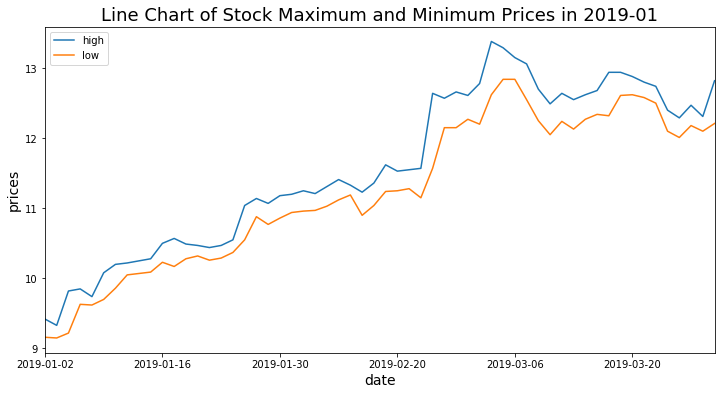

In [65]:
print('Task-7: as picture1')
data7=data['2019-01-01':'2019-01-31']
data[['high','low']].plot(figsize=(12,6))
plt.legend(loc = 2)
plt.xlabel("date", fontsize=14)
plt.ylabel("prices", fontsize=14)
plt.title('Line Chart of Stock Maximum and Minimum Prices in 2019-01',fontsize=18)
plt.show()

(8) 绘制该股票在此季度内每日收盘价与开盘价之差与当日成交量之间的散点图。

Task-8: as picture2


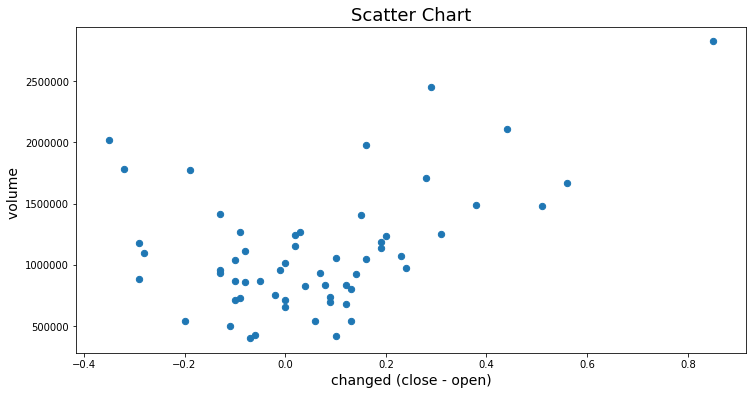

In [62]:
print('Task-8: as picture2')
data['difference']=data.apply(lambda x:x['close']-x['open'],axis=1)
plt.figure(figsize=(12,6)) 
plt.scatter(data['difference'],data['volume'],s=40)
plt.title("Scatter Chart", fontsize=18)
plt.ylabel("volume ", fontsize=14)
plt.xlabel("changed (close - open)", fontsize=14)
plt.show()

In [63]:
#额外思考 每日收盘价与开盘价之差与当日成交量之间 是否具有相关性？
import pandas as pd

df=pd.DataFrame()
df['difference']=data['difference']
df['volume']=data['volume']
print(df.corr())

            difference    volume
difference    1.000000  0.424093
volume        0.424093  1.000000


按照一个简单的相关性划分表的话

        相关系数
        0.8-1.0 极强相关
        0.6-0.8 强相关
        0.4-0.6 中等程度相关
        0.2-0.4 弱相关 　　
        0.0-0.2 极弱相关或无相关
似乎每日收盘价与开盘价之差与当日成交量之间有那么一点点中等程度的正相关性。